# Introduction To Data Science – Assignment 1

---

### Sections A – B – C – D

---

***Instructions***

Due Date: Sunday 18th September 2022 – 11:59PM

Name the file in the format Lyyxxxx and save it as .ipynb (e.g. L201234.ipynb)

Submission will be taken on **GitHub and Google Classroom (submit the .ipynb file)** - Instructions to upload onto GitHub are provided in the link https://docs.google.com/document/d/1BR1ULOGeGWJVU6Rr6Qty1FR-quVRZyRvQGII6nEs-wo/edit?usp=sharing

After uploading and submitting the .ipynb file onto Google Classroom, also private comment the link to the GitHub repository.

All source files needed to complete this assignment can be found on the following Google Drive link https://drive.google.com/drive/folders/1VrkaVcExGWqilSeh50WZe4gUBjmUiJ9b?usp=sharing

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

Happy Coding 😊

---

---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [27]:
def check_input(arr):

    row_length = len(arr)
    col_length = len(arr[0])

    
    for i in range(row_length):
        val = arr[i][0]
        for j in range(col_length):
            if val == arr[i][j] and j != 0:
                return False

    for i in range(row_length):
        val = arr[0][i]
        for j in range(col_length):
            if val == arr[j][i] and j != 0:
                return False


    for i in range(row_length):
        for j in range(col_length):
          if isinstance(arr[i][j], int):
            continue
          else:
            return False

    return True

In [28]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

True
False
False


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [ ]:
!wget https://drive.google.com/file/d/15Mi7J35JQ3kqZTSb5EVKbK4-6G5wEpwJ/view?usp=sharing

In [5]:
import pandas as pd 
read=pd.read_csv("StudentMarkSheet.csv")
read

,Student name,Exam name,Exam date,Marks
0,James Walker,Biology,05/06/2016,31.0
1,Velma Clemons,Biology,05/06/2016,43.0
2,Kibo Underwood,Biology,05/06/2016,81.0
3,Louis Mcgee,Biology,05/06/2016,11.0
4,Phyllis Paul,Biology,05/06/2016,18.0
...,...,...,...,...
195,Yen Bowers,Sociology,21/06/2016,52.0
196,Ryan Pena,Sociology,21/06/2016,16.0
197,Portia Hamilton,Sociology,21/06/2016,34.0
198,Sydnee Chambers,Sociology,21/06/2016,76.0


**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [13]:
print(len(read))
print(read.isnull().sum().sum())
print(len(read.dropna()))

200
4
196


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [16]:
read=pd.read_csv("StudentMarkSheet.csv")
read.set_index("Student name",inplace=True)
store=read.loc["James Walker"]
store

,Exam name,Exam date,Marks
Student name,,,
James Walker,Biology,05/06/2016,31.0
James Walker,Chemistry,15/06/2016,61.0
James Walker,Mathematics,29/07/2016,23.0
James Walker,Physics,10/06/2016,100.0
James Walker,Sociology,21/06/2016,73.0


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [ ]:
read=pd.read_csv("StudentMarkSheet.csv")
read.set_index("Exam name",inplace=True)
mean_Biology=read.loc["Biology"].mean()
mean_Mathematics=read.loc["Mathematics"].mean()
mean_Physics=read.loc["Physics"].mean()
mean_Chemistry=read.loc["Chemistry"].mean()
mean_Sociology=read.loc["Sociology"].mean()
mean_Philosophy=read.loc["Philosophy"].mean()

**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

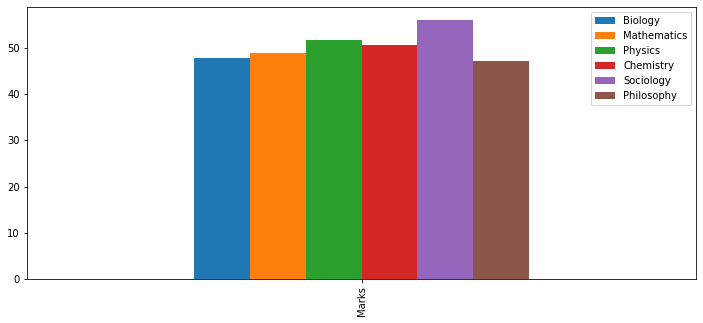

In [18]:
info=pd.DataFrame({'Biology':mean_Biology,'Mathematics':mean_Mathematics,'Physics':mean_Physics,
                  'Chemistry':mean_Chemistry,'Sociology':mean_Sociology,'Philosophy':mean_Philosophy})
info.head(6).plot(kind='bar',figsize=(12,5))

---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [ ]:
!wget https://drive.google.com/file/d/1d_3c7iD2wF59yXPTB5pWNFSjdYi5mSGG/view?usp=sharing

In [20]:
read=pd.read_csv("CatData.csv")
read

,Tail Length (cm),Mass (kg)
0,18.1,3.750
1,18.6,3.800
2,19.5,3.250
3,19.3,3.450
4,19.0,3.650
...,...,...
337,20.7,4.000
338,20.2,3.400
339,19.3,3.775
340,21.0,4.100


**Part B** - Identify the independant and dependant variables (comment answer below)

In [ ]:
# dependant variable: Length of Tail
# independant variable:Mass 

**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [22]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

num=int(len(read)*0.8)
train_data=read[num:]
test_data=read[:num]

model=linear_model.LinearRegression()
train_x=np.array(train_data[["Mass (kg)"]])
train_y=np.array(train_data[["Tail Length (cm)"]])

model.fit(train_x,train_y)
slope=model.coef_
intercept=model.intercept_


**Part D** - Print the values for slope and y-intercept

In [23]:
print (slope[0])
print (intercept)

[1.15581561]
[15.26456236]


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

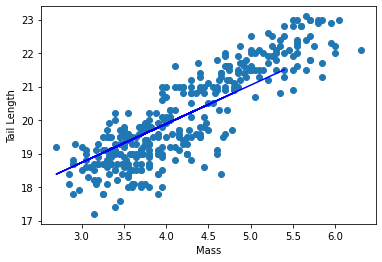

In [26]:
plt.scatter(read["Mass (kg)"],read["Tail Length (cm)"])
plt.plot(train_x,slope[0]*train_x + intercept,color='Blue')
plt.xlabel("Mass")
plt.ylabel("Tail Length")
plt.show()